<h1 style="display:flex; justify-content:center">
Projet PRBI24
</h1>

<h3 style="display:flex; justify-content:center; color:#bf1515">
Classification de chiffres manuscrits en exploitant l'algorithme des K-Moyennes
</h3>

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn

<h2>
I - Apprentissage
</h2>

In [70]:
# Path to file
file_path = './optdigits.tra'

# Charger le fichier
with open(file_path, 'r') as f:
    lines = f.readlines()

In [71]:
# Vérification de la structure d'une ligne de données
data_lines = lines[:5]  # Lire 5 lignes
data_lines

['0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0\n',
 '0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0\n',
 '0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7\n',
 '0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4\n',
 '0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6\n']

In [72]:
data = []  # va contenir toutes les lignes sous forme de liste de nombres

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()  # enlève le \n à la fin
        numbers = [int(n) for n in line.split(',') if n.strip() != '']  # transforme en int
        data.append(numbers)

# Exemple : afficher la première ligne
numbers = np.array(data)
print(f"Nombre de lignes : {len(numbers)}")
print(f"Taille de colonnes : {len(numbers[0])}")
print(f"Contenu ligne 1 : {numbers[0]}")


Nombre de lignes : 3823
Taille de colonnes : 65
Contenu ligne 1 : [ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0  0]


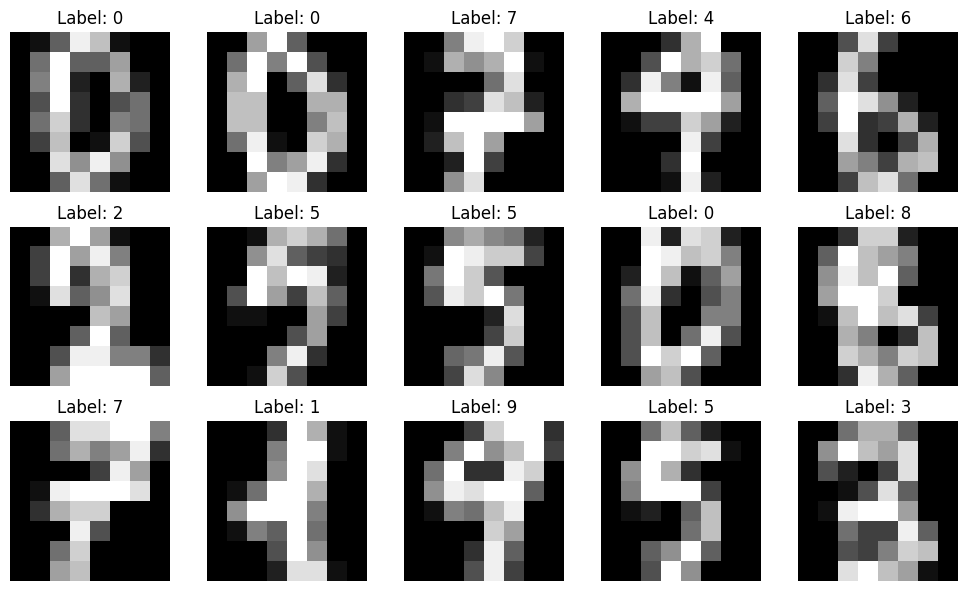

In [73]:
all_images = []
all_labels = []

for number in numbers :
    pixels = number[:-1]  # les 64 premiers
    label = number[-1]    # l'étiquette
    all_images.append(pixels)
    all_labels.append(label)

# Convertir en array NumPy pour manipuler facilement
images_array = np.array(all_images)  # shape (n_samples, 64)
labels_array = np.array(all_labels)  # shape (n_samples,)

# Visualisation de plusieurs images au hasard
fig, axes = plt.subplots(3, 5, figsize=(10,6))  # 15 images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_array[i].reshape(8,8), cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels_array[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\zakel\AppData\Local\Temp\ipykernel_27232\688378135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')


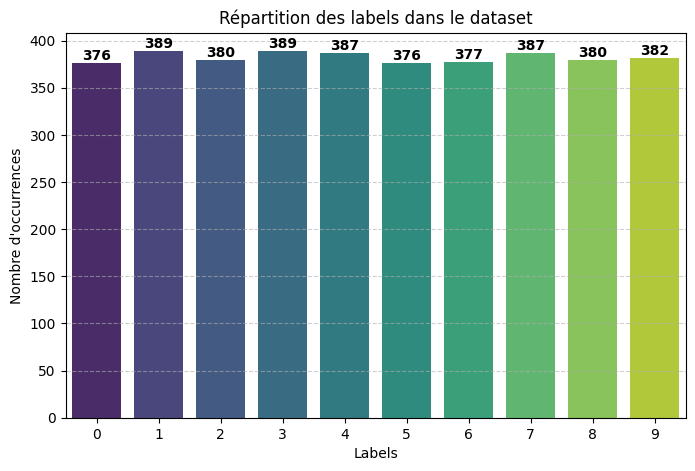

In [74]:
# Compter les occurrences de chaque label
unique_labels, counts = np.unique(all_labels, return_counts=True)

# DataFrame pour Seaborn
df = pd.DataFrame({'Label': unique_labels, 'Count': counts})

# Plot Seaborn
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')

plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des labels dans le dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajout des valeurs au-dessus des barres
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

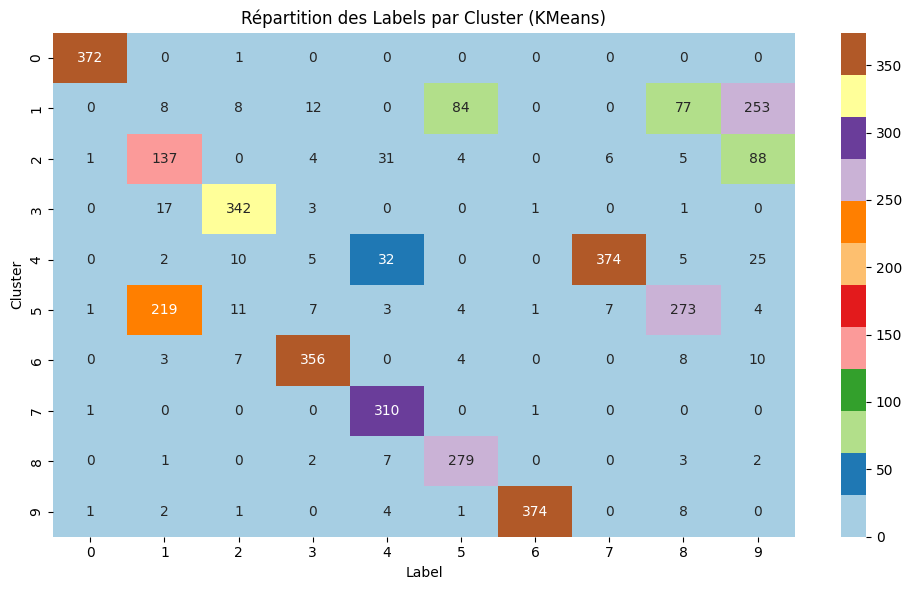

In [75]:
X = numbers[:, :-1]  # Features (8x8 = 64)
y = numbers[:, -1]   # Labels

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Convertir en DataFrame pour analyse
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters

# Histogramme par cluster : tableau croisé
cluster_summary = pd.crosstab(df['cluster'], df['label'])

# Heatmap visuelle
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='Paired')
plt.title('Répartition des Labels par Cluster (KMeans)')
plt.xlabel('Label')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

### Analyse du Clustering KMeans

- Environ 5 clusters sont bien alignés avec une seule classe dominante (ex : cluster 0 → classe 0, cluster 3 → classe 2, etc.).
- D'autres clusters comme le 1, 2 et 5 montrent une forte confusion entre plusieurs classes (notamment la classe 9).
- Score silhouette moyen ≈ 0.18, indiquant une faible séparation globale entre clusters.
- Conclusion : le clustering est **partiellement réussi**, mais perfectible. Il serait pertinent de :
  - tester une réduction de dimension (PCA),
  - comparer avec d'autres algorithmes (DBSCAN, GMM),
  - appliquer la CAH comme prévu dans la suite du projet.

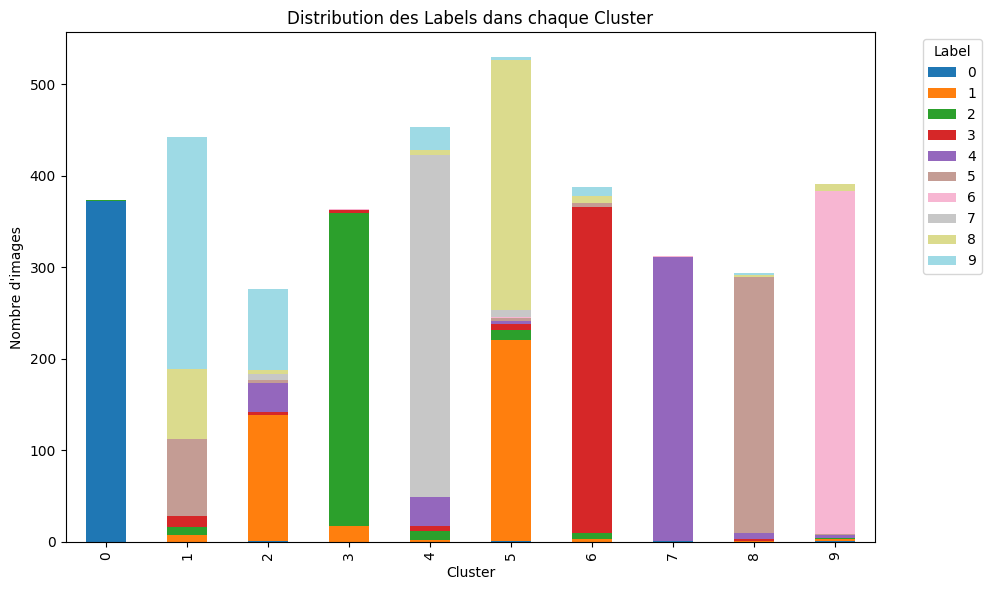

In [76]:
cluster_summary = pd.crosstab(df['cluster'], df['label'])

# Barplot empilé
cluster_summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Distribution des Labels dans chaque Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'images')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


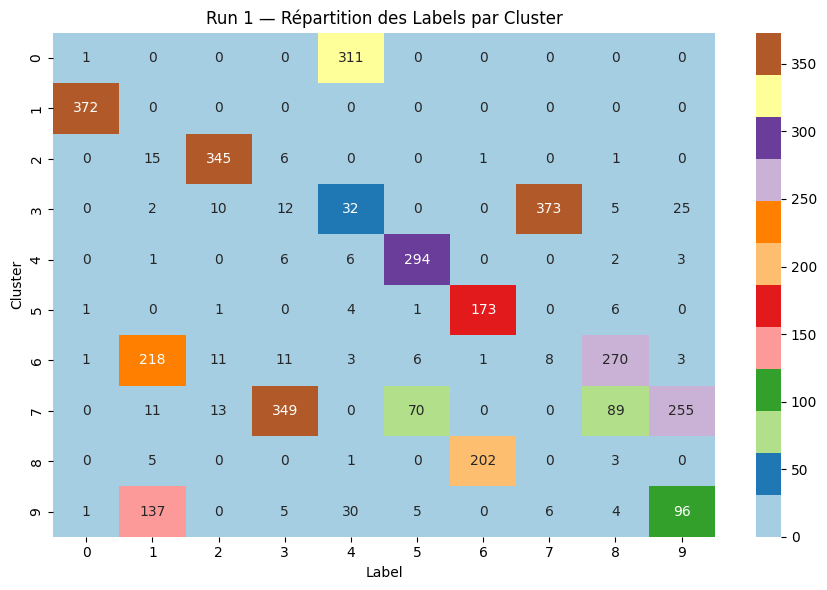

Indice de silhouette moyen : 0.1756


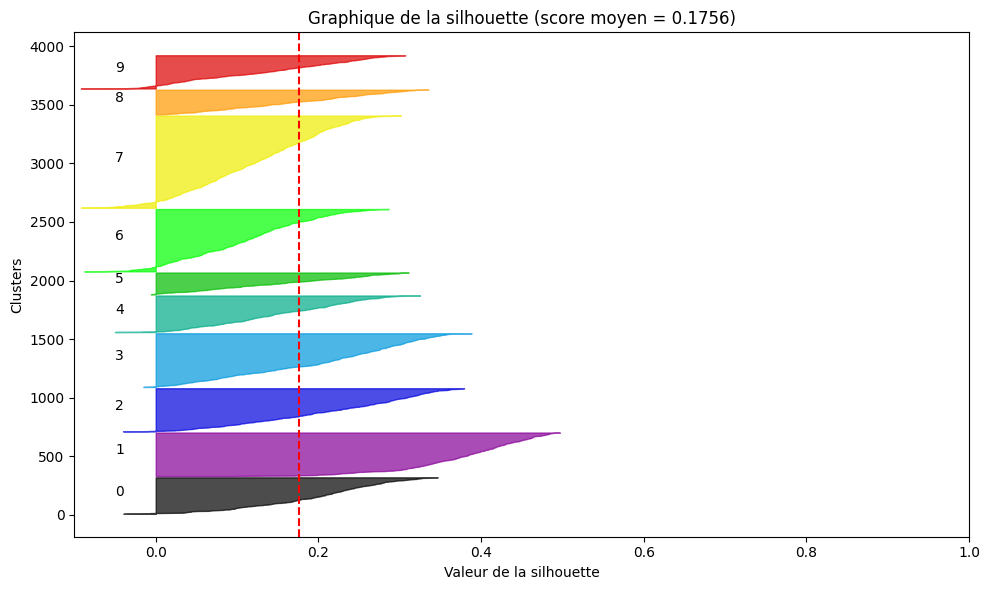

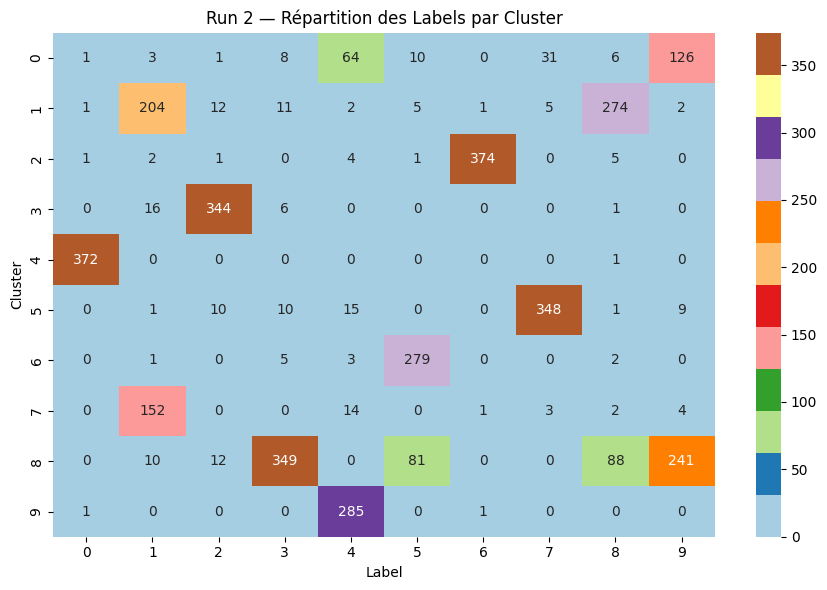

Indice de silhouette moyen : 0.1890


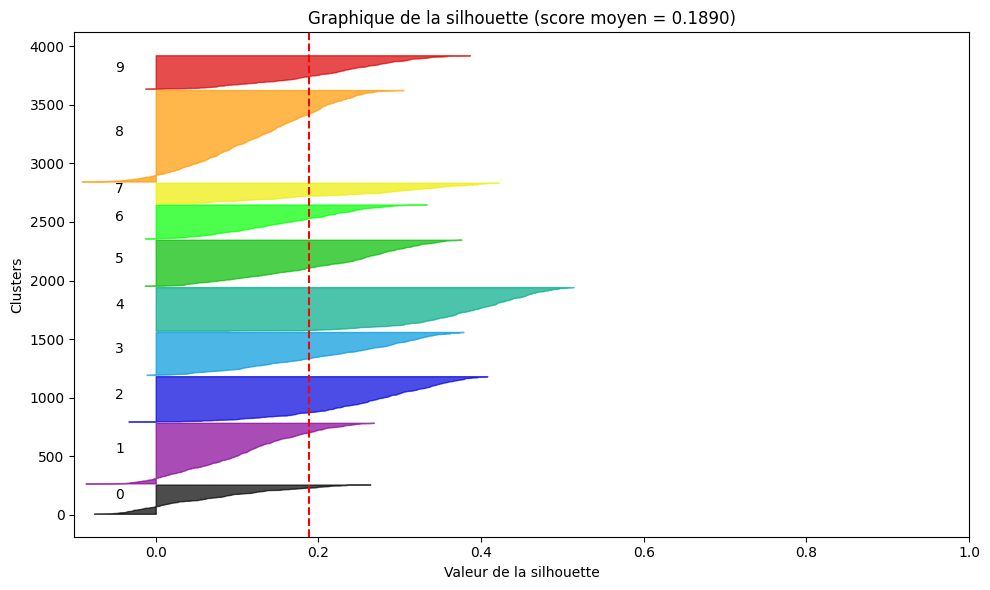

In [77]:
n_runs = 2  # nombre de clustering différents

for run in range(n_runs):
    kmeans = KMeans(n_clusters=10, random_state=run, n_init='auto')
    clusters = kmeans.fit_predict(X)

    # DataFrame pour analyse
    df = pd.DataFrame(X)
    df['label'] = y
    df['cluster'] = clusters

    # Crosstab cluster vs label
    cluster_summary = pd.crosstab(df['cluster'], df['label'])

    # Heatmap
    plt.figure(figsize=(9,6))
    sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='Paired')
    plt.title(f'Run {run+1} — Répartition des Labels par Cluster')
    plt.xlabel('Label')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()

    sil_score = silhouette_score(X, clusters)
    print(f"Indice de silhouette moyen : {sil_score:.4f}")

    # Calcul des silhouettes individuelles
    sample_silhouette_values = silhouette_samples(X, clusters)

    plt.figure(figsize=(10,6))
    y_lower = 10
    for i in range(10):  # pour chaque cluster
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 10)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 de gap entre clusters

    plt.xlabel("Valeur de la silhouette")
    plt.ylabel("Clusters")
    plt.title(f"Graphique de la silhouette (score moyen = {sil_score:.4f})")
    plt.axvline(x=sil_score, color="red", linestyle="--")
    plt.xlim([-0.1, 1])
    plt.tight_layout()
    plt.show()


## 📊 1. **Interprétation d'un score moyen de silhouette**

### ➤ Rappel : échelle du score silhouette
| Score Silhouette     | Interprétation rapide                     |
|----------------------|-------------------------------------------|
| 0.71 – 1.0           | Clustering **excellent**                 |
| 0.51 – 0.70          | Clustering **correct/bien**               |
| 0.26 – 0.50          | Clustering **moyen**                      |
| 0.0  – 0.25          | Clustering **faible / bruit / confusion**  |
| < 0                  | Mauvais, points dans le **mauvais cluster**  |

---

## 2. **Interprétation d'un graphe de silhouette**

### Ce que tu vois :
- Chaque **bande horizontale** représente **un cluster**.
- La **longueur** de la bande = **valeurs de silhouette** pour les points de ce cluster.
- La **ligne rouge** verticale = **score moyen global** (ici 0.1890).

### Comment lire ça :
- Plus les bandes sont **larges à droite** (vers 1), mieux c’est.
- Les bandes **qui vont à gauche de 0** →  **mauvais clustering** pour ces points (ils sont peut-être mal placés).


## 3. **Interprétation globale** :

- **score = 0.1890** est **proche de 0**, donc :
  - Les clusters sont **faiblement séparés**.
  - Les points sont **moyennement bien** dans leur cluster → un peu de confusion entre clusters.

- Le clustering **n’est pas optimal** avec 10 clusters ici.
- Probablement que :
  - Les données **se recoupent trop** pour KMeans (peut-être besoin de PCA ou autre clustering).
  - Ou le **k=10** n’est pas idéal.

---

##  Que faire ?
- Teste **d’autres k (nb de clusters)** → et trace la **silhouette moyenne en fonction de k**.
- Applique **PCA** pour **réduire la dimensionnalité** → clustering souvent meilleur.
- Teste d’autres algos : **DBSCAN, Agglomerative, GaussianMixture** ?

K=10 --> Silhouette Score = 0.1836
K=11 --> Silhouette Score = 0.1882
K=12 --> Silhouette Score = 0.1880
K=13 --> Silhouette Score = 0.1894
K=14 --> Silhouette Score = 0.1848
K=15 --> Silhouette Score = 0.1760
K=16 --> Silhouette Score = 0.1707
K=17 --> Silhouette Score = 0.1757
K=18 --> Silhouette Score = 0.1645
K=19 --> Silhouette Score = 0.1663
K=20 --> Silhouette Score = 0.1649


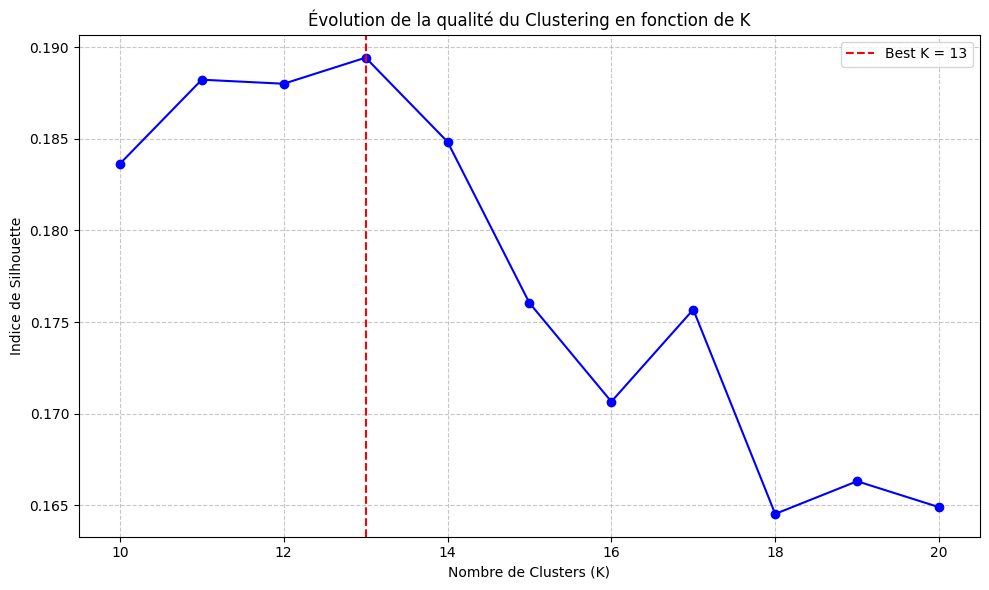


 Meilleur K = 13 avec un score de silhouette de 0.1894


In [78]:
k_range = range(10, 21)  # K de 10 à 20
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42 ,n_init='auto')
    clusters = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, clusters)
    silhouette_scores.append(sil_score)

    print(f"K={k} --> Silhouette Score = {sil_score:.4f}")

# Visualisation : K vs Silhouette Score
plt.figure(figsize=(10,6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Indice de Silhouette')
plt.title('Évolution de la qualité du Clustering en fonction de K')
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le meilleur K
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Meilleur K = {best_k} avec un score de silhouette de {best_score:.4f}")


### On va répéter plusieurs fois l'opération et regarder en moyenne quelle est le meilleur cas


🔁 Run 1/10
K=10 --> Silhouette Score = 0.1801
K=11 --> Silhouette Score = 0.1883
K=12 --> Silhouette Score = 0.1924
K=13 --> Silhouette Score = 0.1819
K=14 --> Silhouette Score = 0.1845
K=15 --> Silhouette Score = 0.1742
K=16 --> Silhouette Score = 0.1688
K=17 --> Silhouette Score = 0.1461
K=18 --> Silhouette Score = 0.1364
K=19 --> Silhouette Score = 0.1441
K=20 --> Silhouette Score = 0.1443

🔁 Run 2/10
K=10 --> Silhouette Score = 0.1706
K=11 --> Silhouette Score = 0.1786
K=12 --> Silhouette Score = 0.1891
K=13 --> Silhouette Score = 0.1846
K=14 --> Silhouette Score = 0.1757
K=15 --> Silhouette Score = 0.1814
K=16 --> Silhouette Score = 0.1605
K=17 --> Silhouette Score = 0.1679
K=18 --> Silhouette Score = 0.1770
K=19 --> Silhouette Score = 0.1451
K=20 --> Silhouette Score = 0.1622

🔁 Run 3/10
K=10 --> Silhouette Score = 0.1746
K=11 --> Silhouette Score = 0.1846
K=12 --> Silhouette Score = 0.1762
K=13 --> Silhouette Score = 0.1852
K=14 --> Silhouette Score = 0.1868
K=15 --> Silhouette

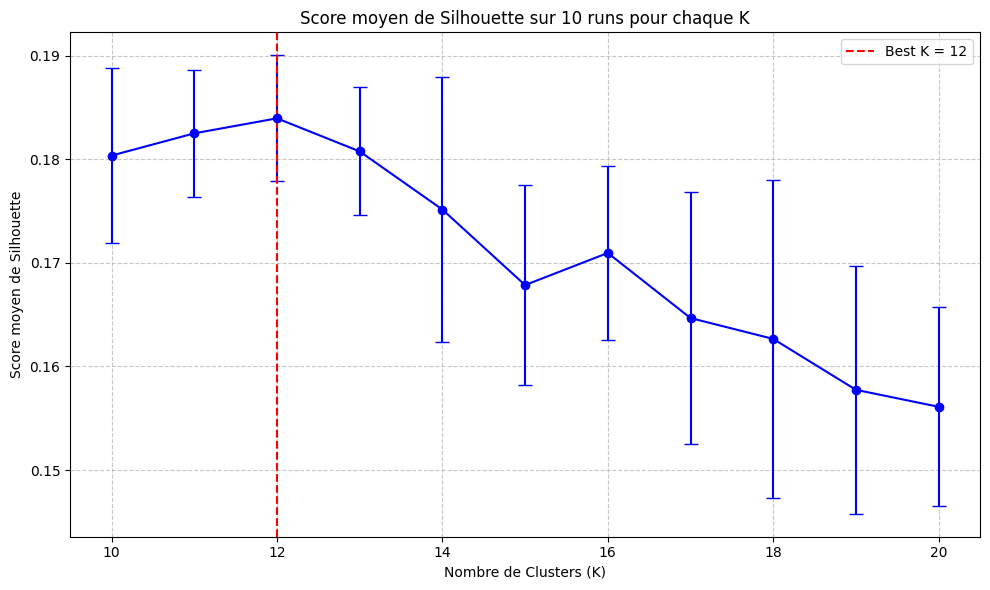


 Meilleur K en moyenne = 12 avec un score moyen de 0.1839


In [79]:
X = numbers[:, :-1]  # Features
n_runs = 10
k_values = range(10, 21)

# Stocker tous les scores pour chaque K, sur tous les runs
all_scores = {k: [] for k in k_values}

for run in range(n_runs):
    print(f"\n🔁 Run {run+1}/{n_runs}")
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init='auto')  # random_state non fixé = variation
        clusters = kmeans.fit_predict(X)

        sil_score = silhouette_score(X, clusters)
        all_scores[k].append(sil_score)
        print(f"K={k} --> Silhouette Score = {sil_score:.4f}")

# Moyenne et écart-type pour chaque K
mean_scores = []
std_scores = []

for k in k_values:
    mean = np.mean(all_scores[k])
    std = np.std(all_scores[k])
    mean_scores.append(mean)
    std_scores.append(std)
    print(f"K={k} --> Moyenne Silhouette = {mean:.4f}, Écart-type = {std:.4f}")

# Visualisation
plt.figure(figsize=(10,6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=5, color='b')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Score moyen de Silhouette')
plt.title(f'Score moyen de Silhouette sur {n_runs} runs pour chaque K')
plt.grid(True, linestyle='--', alpha=0.7)

# Meilleur K en moyenne
best_k_index = np.argmax(mean_scores)
best_k = k_values[best_k_index]
best_mean_score = mean_scores[best_k_index]
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Meilleur K en moyenne = {best_k} avec un score moyen de {best_mean_score:.4f}")


<h2>
II - Test
</h2>

In [80]:
# Charger le fichier optdigits.tes
test_file_path = './optdigits.tes'

test_data = []
with open(test_file_path, 'r') as f:
    for line in f:
        numbers = [int(n) for n in line.strip().split(',') if n.strip() != '']
        test_data.append(numbers)

test_numbers = np.array(test_data)

# Exemple : afficher la première ligne
print(f"Nombre de lignes : {len(test_numbers)}")
print(f"Taille de colonnes : {len(test_numbers[0])}")
print(f"Contenu ligne 1 : {test_numbers[0]}")

X_test = test_numbers[:, :-1]
y_test = test_numbers[:, -1]

Nombre de lignes : 1797
Taille de colonnes : 65
Contenu ligne 1 : [ 0  0  5 13  9  1  0  0  0  0 13 15 10 15  5  0  0  3 15  2  0 11  8  0
  0  4 12  0  0  8  8  0  0  5  8  0  0  9  8  0  0  4 11  0  1 12  7  0
  0  2 14  5 10 12  0  0  0  0  6 13 10  0  0  0  0]


Association cluster → label dominant :

🔹 Cluster 0 → Label 0 (372/373 = 99.73%)
🔹 Cluster 1 → Label 9 (253/442 = 57.24%)
🔹 Cluster 2 → Label 1 (137/276 = 49.64%)
🔹 Cluster 3 → Label 2 (342/364 = 93.96%)
🔹 Cluster 4 → Label 7 (374/453 = 82.56%)
🔹 Cluster 5 → Label 8 (273/530 = 51.51%)
🔹 Cluster 6 → Label 3 (356/388 = 91.75%)
🔹 Cluster 7 → Label 4 (310/312 = 99.36%)
🔹 Cluster 8 → Label 5 (279/294 = 94.90%)
🔹 Cluster 9 → Label 6 (374/391 = 95.65%)


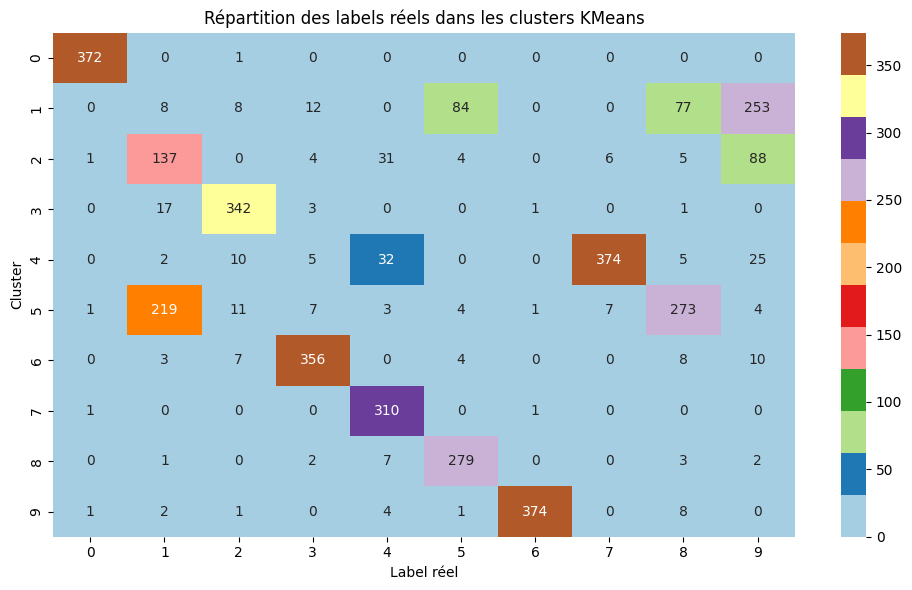

In [81]:
from scipy.stats import mode

# Clustering entraîné
kmeans = KMeans(n_clusters=10, n_init='auto', random_state=42)
kmeans.fit(X)  # X = optdigits.tra

# Prédire les clusters d'entraînement
train_clusters = kmeans.predict(X)

# Associer chaque cluster à un label majoritaire
cluster_to_label = {}
print("Association cluster → label dominant :\n")

for cluster in range(10):
    labels_in_cluster = y[train_clusters == cluster]
    if len(labels_in_cluster) > 0:
        most_common = mode(labels_in_cluster, keepdims=True).mode[0]
        count = np.sum(labels_in_cluster == most_common)
        total = len(labels_in_cluster)
        cluster_to_label[cluster] = most_common

        print(f"🔹 Cluster {cluster} → Label {most_common} "
              f"({count}/{total} = {count/total:.2%})")

# DataFrame combiné
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = train_clusters

# Tableau croisé
cluster_summary = pd.crosstab(df['cluster'], df['label'])

# Affichage heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='Paired')
plt.title("Répartition des labels réels dans les clusters KMeans")
plt.xlabel("Label réel")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

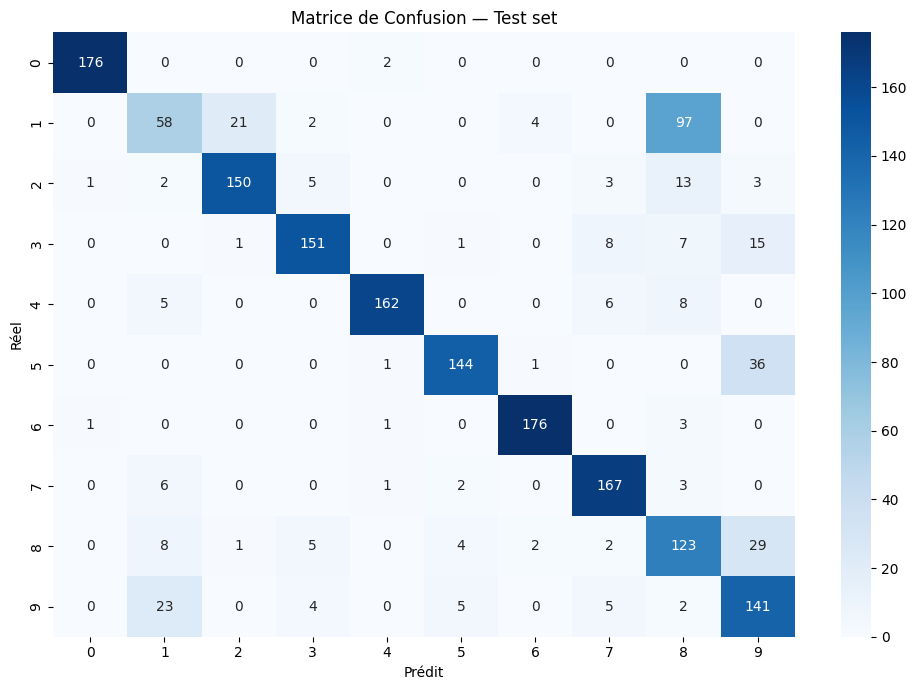

Précision globale sur la base de test : 0.8058


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prédire à quel cluster appartient chaque élément de test
test_clusters = kmeans.predict(X_test)

# Associer le label majoritaire du cluster à chaque élément de test
y_pred = np.array([cluster_to_label[cluster] for cluster in test_clusters])

# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)

# Affichage
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion — Test set')
plt.tight_layout()
plt.show()

# Précision globale
acc = accuracy_score(y_test, y_pred)
print(f"Précision globale sur la base de test : {acc:.4f}")


In [83]:
# Afficher les erreurs les plus fréquentes
print("\n Principales confusions (erreurs les plus fréquentes) :")
conf_errors = []

for i in range(10):
    for j in range(10):
        if i != j and conf_mat[i, j] > 0:
            conf_errors.append((i, j, conf_mat[i, j]))

# Trier par nombre d’erreurs décroissant
conf_errors.sort(key=lambda x: x[2], reverse=True)

# Afficher les 5 premières erreurs
for true_label, predicted_label, count in conf_errors[:5]:
    print(f"🔸 {count} fois : le {true_label} a été prédit comme {predicted_label}")



 Principales confusions (erreurs les plus fréquentes) :
🔸 97 fois : le 1 a été prédit comme 8
🔸 36 fois : le 5 a été prédit comme 9
🔸 29 fois : le 8 a été prédit comme 9
🔸 23 fois : le 9 a été prédit comme 1
🔸 21 fois : le 1 a été prédit comme 2


<h2>
III -  Comparaison au Clustering Hiérarchique  (avec le critère de Ward)
</h2>

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X, method='ward')

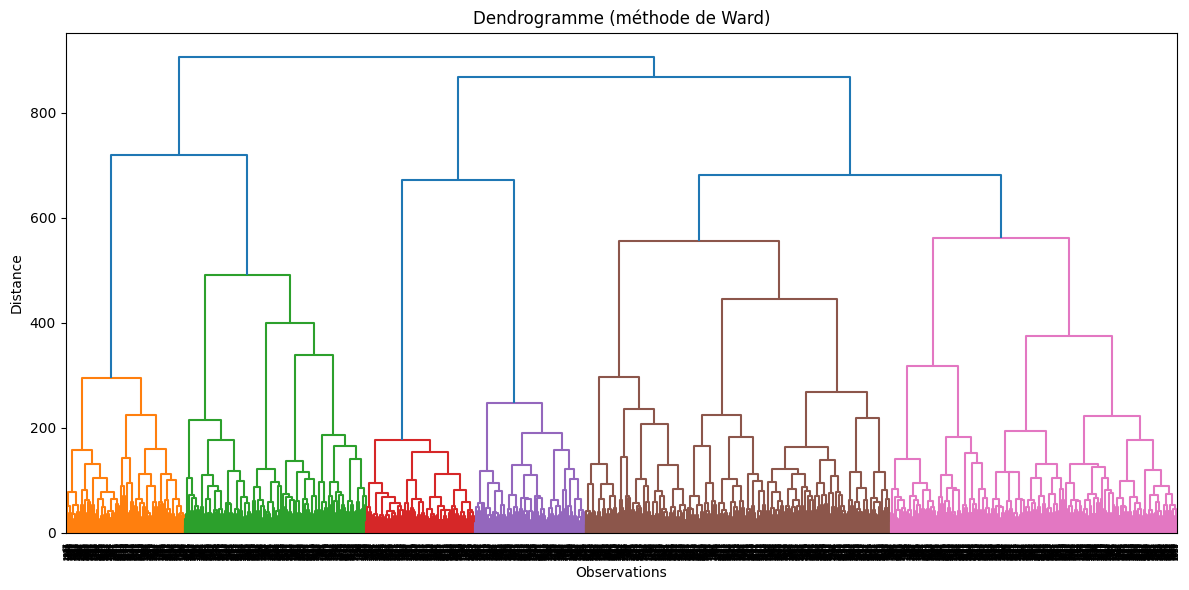

In [85]:
# Dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=25)
plt.title("Dendrogramme (méthode de Ward)")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Indice de silhouette pour K=10 : 0.1745


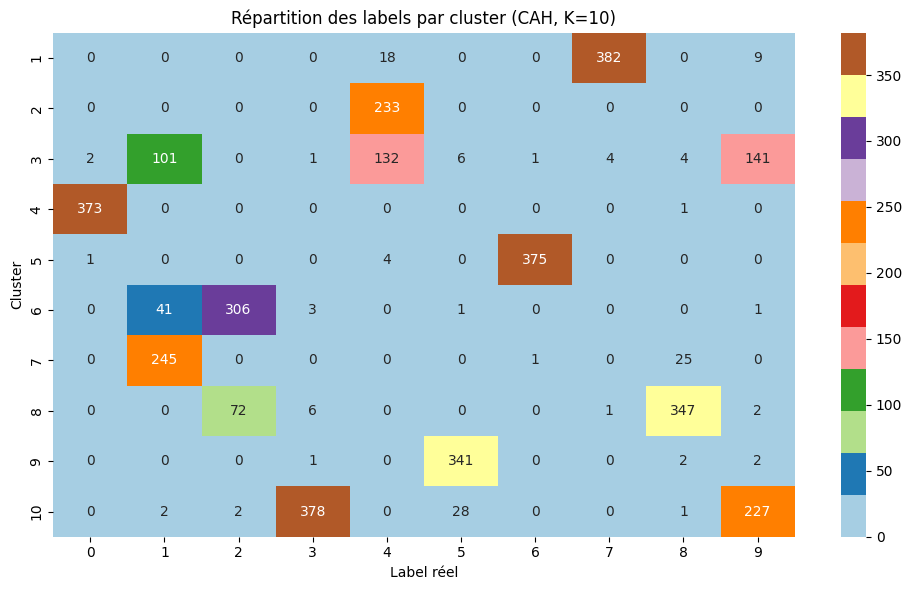

In [86]:
# Clustering avec K=10
k = 10
clusters_10 = fcluster(Z, k, criterion='maxclust')
sil_score_10 = silhouette_score(X, clusters_10)
print(f"Indice de silhouette pour K=10 : {sil_score_10:.4f}")

# Histogramme des labels par cluster (K=10)
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters_10

summary = pd.crosstab(df['cluster'], df['label'])

plt.figure(figsize=(10,6))
sns.heatmap(summary, annot=True, fmt='d', cmap='Paired')
plt.title('Répartition des labels par cluster (CAH, K=10)')
plt.xlabel('Label réel')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

k=10 → silhouette = 0.1745
k=11 → silhouette = 0.1787
k=12 → silhouette = 0.1730
k=13 → silhouette = 0.1744
k=14 → silhouette = 0.1739
k=15 → silhouette = 0.1690
k=16 → silhouette = 0.1607
k=17 → silhouette = 0.1620
k=18 → silhouette = 0.1478
k=19 → silhouette = 0.1508
k=20 → silhouette = 0.1453


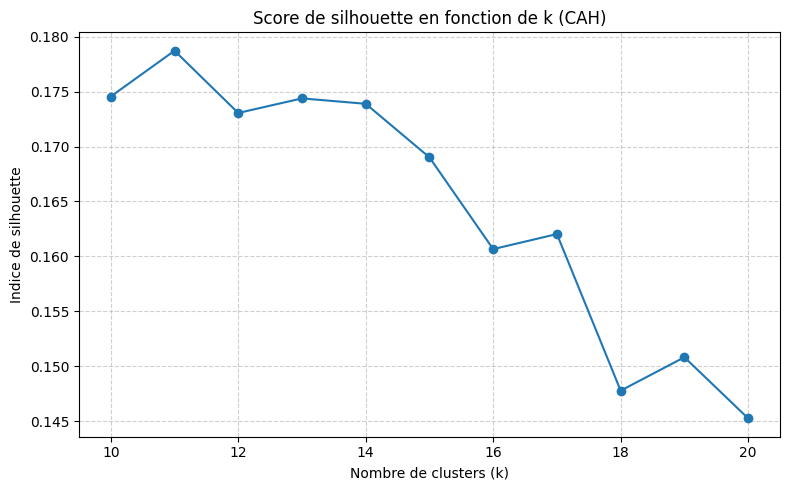


 Meilleur k (CAH) = 11 avec un score de silhouette de 0.1787


In [87]:
# Calculer les indices de silhouette pour k = 10 à 20
k_range = range(10, 21)
silhouette_scores = []

for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)
    print(f"k={k} → silhouette = {score:.4f}")

# 5. Visualiser les scores de silhouette
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Score de silhouette en fonction de k (CAH)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Indice de silhouette")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

best_k_cah = k_range[np.argmax(silhouette_scores)]
print(f"\n Meilleur k (CAH) = {best_k_cah} avec un score de silhouette de {max(silhouette_scores):.4f}")

In [88]:
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, accuracy_score

# Utiliser le meilleur K trouvé avec la CAH
clusters = fcluster(Z, best_k_cah, criterion='maxclust')

# Associer un label majoritaire à chaque cluster
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters

from scipy.stats import mode

cluster_labels = {}
for c in range(1, best_k_cah + 1):  # fcluster commence à 1
    majority = mode(df[df['cluster'] == c]['label'], keepdims=True).mode[0]
    cluster_labels[c] = majority

# Trouver le centre de chaque cluster
cluster_centers = []
for c in range(1, best_k_cah + 1):
    cluster_points = df[df['cluster'] == c].iloc[:, :-2].values
    center = np.mean(cluster_points, axis=0)
    cluster_centers.append(center)

cluster_centers = np.array(cluster_centers)

# Classer les éléments de la base de test
distances = cdist(X_test, cluster_centers)
closest_clusters = np.argmin(distances, axis=1) + 1
y_pred = np.array([cluster_labels[c] for c in closest_clusters])

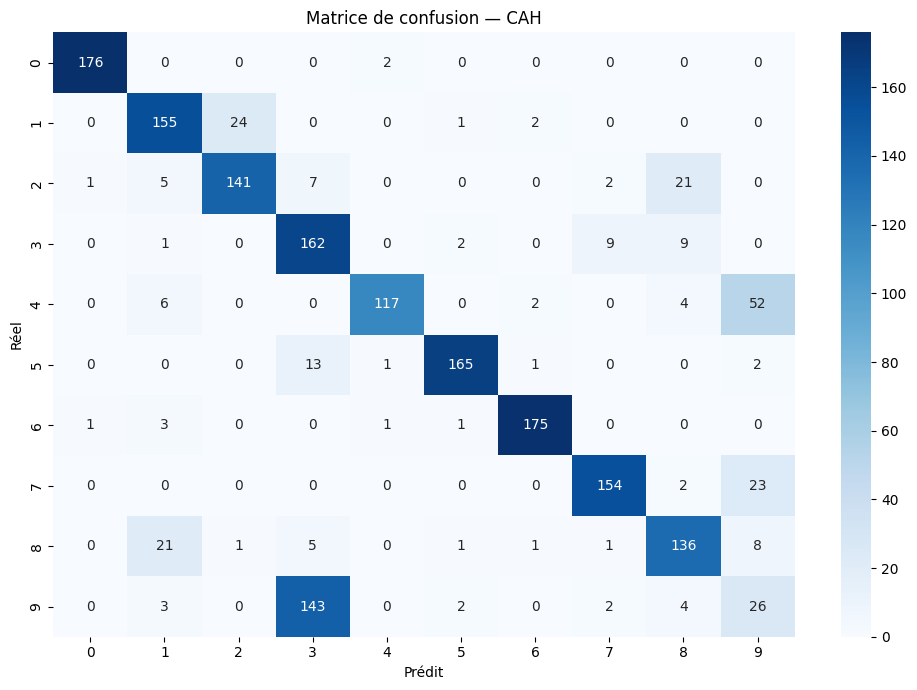

🎯 Précision globale (CAH) : 0.7830


In [89]:
# Évaluer les performances
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Affichage des résultats
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion — CAH")
plt.tight_layout()
plt.show()

print(f"🎯 Précision globale (CAH) : {acc:.4f}")
